In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/sample_data_classification.csv")
df.head(5)

,output,input1,input2,input3
0,1,534,536,466
1,0,264,103,244
2,0,272,339,609
3,1,416,444,330
4,1,520,464,104


In [ ]:
df.describe()

,output,input1,input2,input3
count,100.000000,100.000000,100.000000,100.000000
mean,0.470000,442.120000,446.980000,443.170000
std,0.501614,128.754585,136.538815,184.490949
min,0.000000,55.000000,103.000000,101.000000
25%,0.000000,349.000000,350.000000,304.500000
50%,0.000000,448.500000,450.500000,432.000000
75%,1.000000,525.000000,529.000000,595.250000
max,1.000000,840.000000,948.000000,792.000000


In [ ]:
#Getting a count of null values for each column
df.isna().sum() # There are no null values in the dataset


output    0
input1    0
input2    0
input3    0
dtype: int64

In [ ]:
#Finding correlation
df.corr()



,output,input1,input2,input3
output,1.000000,0.384953,0.477538,-0.102817
input1,0.384953,1.000000,0.616352,0.011842
input2,0.477538,0.616352,1.000000,-0.043485
input3,-0.102817,0.011842,-0.043485,1.000000


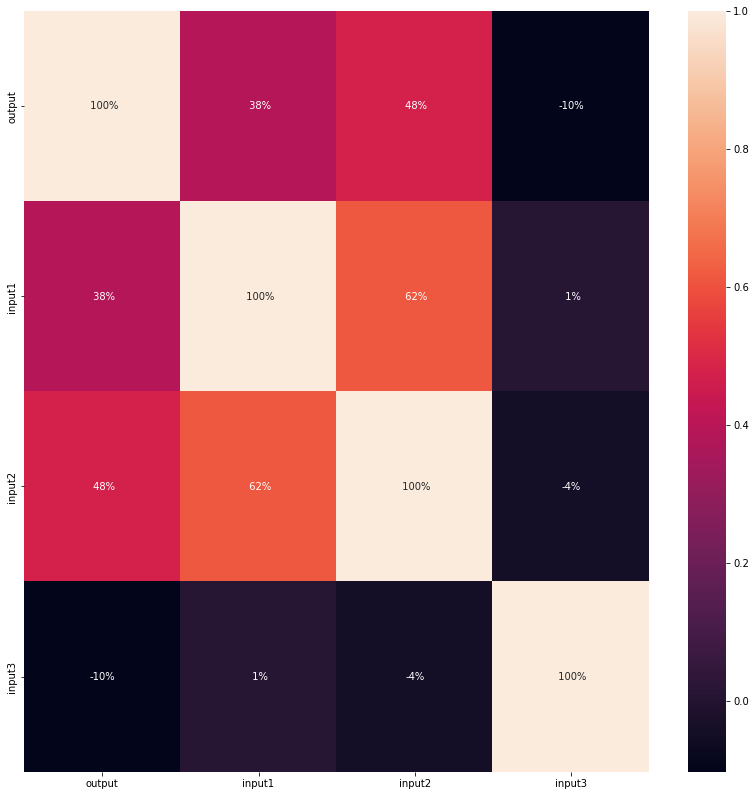

In [ ]:
#Plotting the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True, fmt= " .0%")



In [ ]:
#Getting a count of the outcomes
df["output"].value_counts()



0    53
1    47
Name: output, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


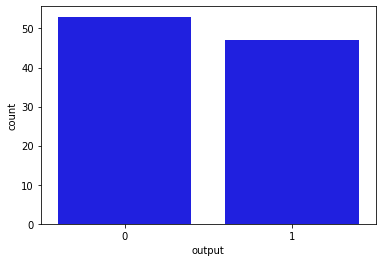

In [ ]:
#Visualizing the target variable
sns.countplot(df["output"], color = "blue")



In [ ]:
#Splitting the data
x = df.drop(["output"], axis=1)
y = df["output"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 5, stratify = y)


In [ ]:
x

,input1,input2,input3
0,534,536,466
1,264,103,244
2,272,339,609
3,416,444,330
4,520,464,104
...,...,...,...
95,259,181,336
96,299,271,338
97,523,455,526
98,683,641,601


In [ ]:
y

0     1
1     0
2     0
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: output, Length: 100, dtype: int64

In [ ]:
#Importing Logistic Regression model 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)



LogisticRegression()

In [ ]:
#Importing accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Model accuracy

y_pred = logistic.predict(x_test)
accuracy_score(y_test, y_pred)

0.64

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 4]
 [5 7]]


In [ ]:
#Importing classification report
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test, y_pred))
cm(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.64      0.58      0.61        12

    accuracy                           0.64        25
   macro avg       0.64      0.64      0.64        25
weighted avg       0.64      0.64      0.64        25



TypeError: ignored

## 2) DECISION TREE

In [ ]:
#IMPORTING
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#Splitting the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, stratify = y)


In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf = 7)

In [ ]:
#Fitting  the model
dtc.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=7)

In [ ]:
#Model accuracy
y_pred = dtc.predict(x_test)
accuracy_score(y_test, y_pred)

0.76

In [ ]:
#Demonstration of overfitting
y_pred_training = dtc.predict(x_train)
accuracy_score(y_train, y_pred_training)

0.8533333333333334

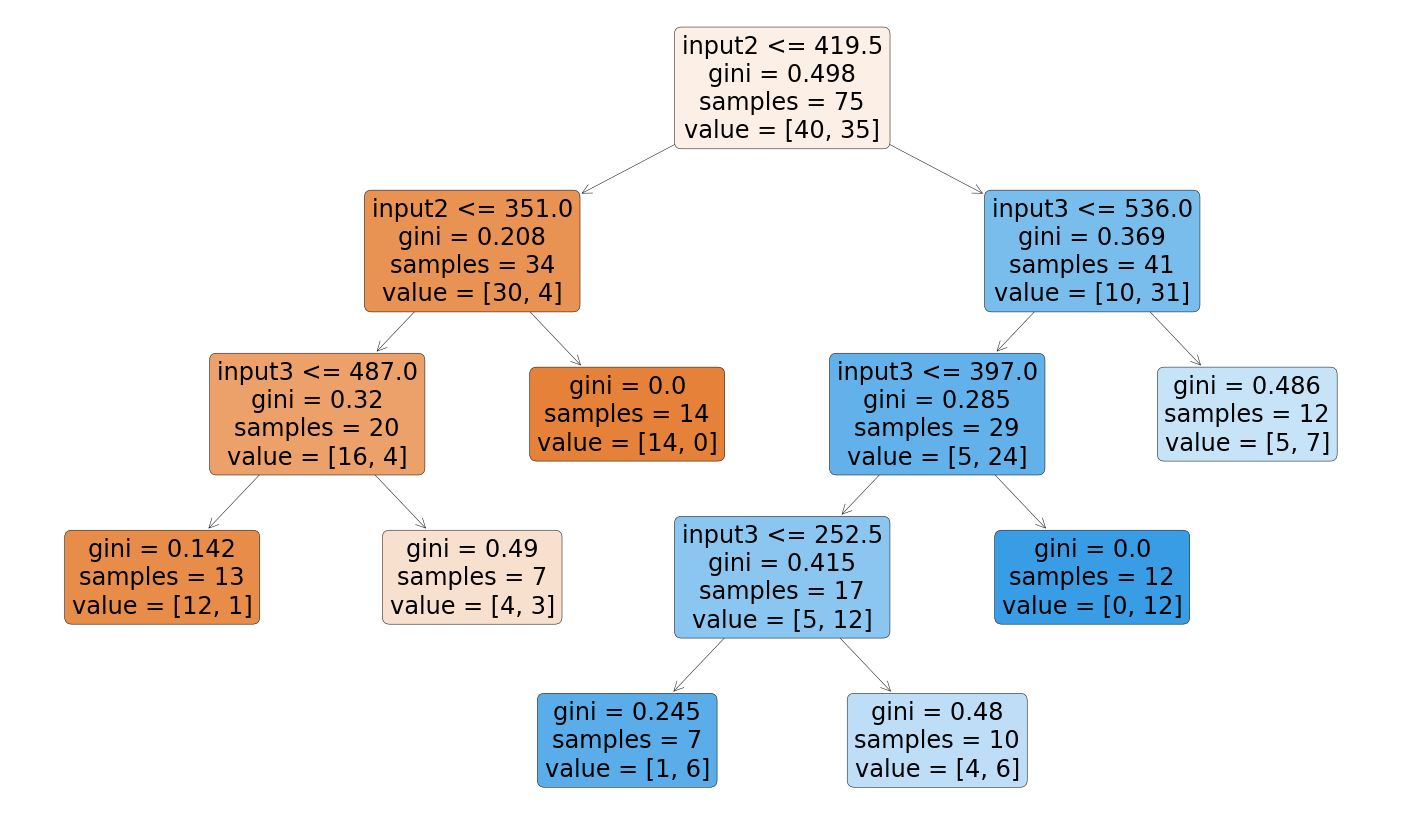

In [ ]:
#Plotting the decisiom tree
from sklearn.tree import plot_tree


plt.figure(figsize=(25,15))
tree = plot_tree(dtc,
                 feature_names = x.columns,
                 filled = True,
                 rounded = True,
                 fontsize = 24)

## 3)RANDOM FOREST CLASSIFIER

In [ ]:
# IMPORTING
from sklearn.ensemble import RandomForestClassifier




In [ ]:
#Splitting the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, stratify = y)


In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Accuracy of the model
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.68

## 4) K-MEANS CLUSTERING (UNSUPERVISED LEARNING)

In [ ]:
# IMPORTING
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Splitting the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, stratify = y)


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#Model accuracy
accuracy_score(y_test, y_pred)

0.44